In [1]:
# Generic ones
import numpy as np
import pandas as pd
import os

# Word processing libraries
import re
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import glob
import gzip

# dfs=[]
data = None
total_count=0
keywords_str='#chinavirus|#wuhanvirus|#chopstickflu|#kungfuvirus|#chinesevirus|#kungflu|#communistvirus|#wuhancoronavirus|#coronajihad'
print('filtering by:', keywords_str)

for file in glob.glob("E:\\Projects\\twitter_covid\\2020-01\\*.gz"):
    print(file)
    df = pd.read_json(path_or_buf=file, lines=True, compression='infer')
#     print('Read. Size: ', df.shape)
    
    total_count+=df.shape[0]
    df = df[df['full_text'].str.contains("(?i)"+keywords_str)]
    df.reset_index(inplace = True, drop = True)
    if data is None:
        data = df
    else:
        data = pd.concat([data, df], axis = 0)
        # Reset_index
        data.reset_index(inplace = True, drop = True)
        
data_orig=data.copy()

print('Size of dataset before filtering:', total_count)
print('Size of dataset after filtering:', data.shape[0])



filtering by: #chinavirus|#wuhanvirus|#chopstickflu|#kungfuvirus|#chinesevirus|#kungflu|#communistvirus|#wuhancoronavirus|#coronajihad
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-21-22.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-21-23.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-00.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-01.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-02.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-03.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-04.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-05.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-06.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-07.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-08.jsonl.gz
E:\Proj

In [3]:
data['hashtags'] = data['entities'].apply(lambda x: x['hashtags'])
data['hashtags'].head(3)

0    [{'text': 'Wuhan', 'indices': [91, 97]}, {'tex...
1    [{'text': 'Wuhanvirus', 'indices': [66, 77]}, ...
2    [{'text': 'WuhanCoronavirus', 'indices': [158,...
Name: hashtags, dtype: object

In [4]:
# Remove empty tweets
data.dropna(subset = ['full_text'], inplace = True)
# The unicode accounts for Chinese characters and punctuations.
def strip_chinese_words(string):
    # list of english words
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(string))
    
    # Remove word from the list, if not english
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string
# Apply strip_chinese_words(...) on the column 'text'
data['full_text'] = data['full_text'].apply(lambda x: strip_chinese_words(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id,quoted_status_id_str,quoted_status_permalink,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags
0,2020-01-22 01:32:42+00:00,1219794987451158528,1219794987451158528,“The patient became ill *four days* after arri...,False,"[0, 151]","{'hashtags': [{'text': 'Wuhan', 'indices': [91...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhan', 'indices': [91, 97]}, {'tex..."
1,2020-01-22 01:59:20+00:00,1219801689336664064,1219801689336664064,@Laurie_Garrett @MackayIM The public is unders...,False,"[26, 116]","{'hashtags': [{'text': 'Wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.219767e+18,1.219767e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhanvirus', 'indices': [66, 77]}, ..."
2,2020-01-22 02:20:07+00:00,1219806921953181697,1219806921953181696,Just in: Wuhan forbids social assemblies and l...,False,"[0, 279]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,0.0,"{'media': [{'id': 1219806876403036160, 'id_str...",NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [158,..."
3,2020-01-22 02:09:41+00:00,1219804293907116032,1219804293907116032,"Re #WuhanCoronavirus outbreak, people have bee...",False,"[0, 156]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [3, 2..."
4,2020-01-22 02:59:14+00:00,1219816763963015168,1219816763963015168,RT @MiffyPekkle: Every country is in highest a...,False,"[0, 140]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [54, ..."


In [5]:
# Define function to sieve out @users in a tweet:
def mentioned_users(string):
    usernames = re.findall('@[^\s]+', string)
    return usernames
# Create a new column and apply the function on the column 'text'
data['mentioned_users'] = data['full_text'].apply(lambda x: mentioned_users(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id_str,quoted_status_permalink,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags,mentioned_users
0,2020-01-22 01:32:42+00:00,1219794987451158528,1219794987451158528,“The patient became ill *four days* after arri...,False,"[0, 151]","{'hashtags': [{'text': 'Wuhan', 'indices': [91...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhan', 'indices': [91, 97]}, {'tex...",[]
1,2020-01-22 01:59:20+00:00,1219801689336664064,1219801689336664064,@Laurie_Garrett @MackayIM The public is unders...,False,"[26, 116]","{'hashtags': [{'text': 'Wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.219767e+18,1.219767e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhanvirus', 'indices': [66, 77]}, ...","[@Laurie_Garrett, @MackayIM]"
2,2020-01-22 02:20:07+00:00,1219806921953181697,1219806921953181696,Just in: Wuhan forbids social assemblies and l...,False,"[0, 279]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,0.0,"{'media': [{'id': 1219806876403036160, 'id_str...",NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [158,...",[]
3,2020-01-22 02:09:41+00:00,1219804293907116032,1219804293907116032,"Re #WuhanCoronavirus outbreak, people have bee...",False,"[0, 156]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [3, 2...",[@sciblogsnz]
4,2020-01-22 02:59:14+00:00,1219816763963015168,1219816763963015168,RT @MiffyPekkle: Every country is in highest a...,False,"[0, 140]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [54, ...",[@MiffyPekkle:]


In [6]:
# Define Emoji_patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
# Define the function to implement POS tagging:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Define the main function to clean text in various ways:
def clean_text(text):
    
    # Apply regex expressions first before converting string to list of tokens/words:
    # 1. remove @usernames
    text = re.sub('@[^\s]+', '', text)
    
    # 2. remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    
    # 3. remove hashtags entirely i.e. #hashtags
    text = re.sub(r'#([^\s]+)', '', text)
    
    # 4. remove emojis
    text = emoji_pattern.sub(r'', text)
    
    # 5. Convert text to lowercase
    text = text.lower()
    
    # 6. tokenise text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # 7. remove numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # 8. remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # 9. remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # 10. pos tag text and lemmatize text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # 11. remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    
    return(text)
# Apply function on the column 'text':
data['cleaned_text'] = data['full_text'].apply(lambda x: clean_text(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_permalink,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags,mentioned_users,cleaned_text
0,2020-01-22 01:32:42+00:00,1219794987451158528,1219794987451158528,“The patient became ill *four days* after arri...,False,"[0, 151]","{'hashtags': [{'text': 'Wuhan', 'indices': [91...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhan', 'indices': [91, 97]}, {'tex...",[],“the patient become ill four day arrive united...
1,2020-01-22 01:59:20+00:00,1219801689336664064,1219801689336664064,@Laurie_Garrett @MackayIM The public is unders...,False,"[26, 116]","{'hashtags': [{'text': 'Wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.219767e+18,1.219767e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhanvirus', 'indices': [66, 77]}, ...","[@Laurie_Garrett, @MackayIM]",public understand easy etc
2,2020-01-22 02:20:07+00:00,1219806921953181697,1219806921953181696,Just in: Wuhan forbids social assemblies and l...,False,"[0, 279]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,0.0,"{'media': [{'id': 1219806876403036160, 'id_str...",NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [158,...",[],wuhan forbids social assembly livestock wild a...
3,2020-01-22 02:09:41+00:00,1219804293907116032,1219804293907116032,"Re #WuhanCoronavirus outbreak, people have bee...",False,"[0, 156]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [3, 2...",[@sciblogsnz],outbreak people ask tamiflu vaccine here's qui...
4,2020-01-22 02:59:14+00:00,1219816763963015168,1219816763963015168,RT @MiffyPekkle: Every country is in highest a...,False,"[0, 140]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [54, ...",[@MiffyPekkle:],rt every country high alert \n\nbloomberg case...


In [7]:
# Define a function to perform this extraction:
def extract_hashtags(hashtag_list):
    # argument:
    # hashtag_list - a list of dictionary(ies), each containing a hashtag
    
    # Create a list to store the hashtags
    hashtags = []
    if isinstance(hashtag_list, float):
        hashtag_list=[]
    
    # Loop through the list:
    for i in range(0, len(hashtag_list)):
        # extract the hashtag value using the key - 'text'
        # For our purposes, we can ignore the indices, which tell us the position of the hashtags in the string of tweet
        # lowercase the text as well
        hashtags.append(hashtag_list[i]['text'].lower())
        
    return hashtags
# Apply function on the column - data['hashtags']
data['hashtags'] = data['hashtags'].apply(lambda x: extract_hashtags(x))
# Check out the updated column 'hashtags'
print(data.head()['hashtags'])

0               [wuhan, wuhanvirus, wuhanpneumonia]
1    [wuhanvirus, wuhancoronavirus, wuhanpneumonia]
2                   [wuhancoronavirus, coronavirus]
3                                [wuhancoronavirus]
4                                [wuhancoronavirus]
Name: hashtags, dtype: object


In [8]:
#Show hashtags
        
data[data['hashtags'].apply(lambda x: True if len(x)>0 else False)]['hashtags']

0                   [wuhan, wuhanvirus, wuhanpneumonia]
1        [wuhanvirus, wuhancoronavirus, wuhanpneumonia]
2                       [wuhancoronavirus, coronavirus]
3                                    [wuhancoronavirus]
4                                    [wuhancoronavirus]
                              ...                      
48706                               [china, wuhanvirus]
48707                               [china, wuhanvirus]
48708                           [coronoavirus, kungflu]
48709                                         [kungflu]
48710                                         [kungflu]
Name: hashtags, Length: 48690, dtype: object

In [9]:
data['location'] = df.user.apply(lambda x: x['location'])
data['acctdesc'] = df.user.apply(lambda x: x['description'])
data[['location','acctdesc']].head(3)

,location,acctdesc
0,ℂ𝕙𝕒𝕟𝔹𝕒𝕖𝕜 ♥ 𝔼𝕏𝕆 𝕃,คีพOT9ค่ะ ใครไม่คีพก็เรื่องของมึง @weareoneEXO
1,,always towards better things
2,,


In [10]:
# Replace NaN (empty) values with n.a to indicate that the user did not state his location
# Define a function to handle this:
def remove_nan(text):
    if pd.isnull(text) == True: # entry is NaN
        text = 'n.a'
    else:
        # lowercase text for possible easy handling
        text = text.lower()
        
    return text
# Apply function on column - data['location']
data['location'] = data['location'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['location'])
# Let's take a quick look at the value_counts()
data['location'].value_counts()

0    ℂ𝕙𝕒𝕟𝔹𝕒𝕖𝕜 ♥ 𝔼𝕏𝕆 𝕃 
1                     
2                     
3                     
4                     
Name: location, dtype: object


n.a                                       47682
                                            394
hong kong                                    57
malaysia                                     16
united states                                14
                                          ...  
midwest u.s.a.  free market capitalist        1
oxford, england                               1
euskal herria                                 1
914                                           1
drowsy but awake!                             1
Name: location, Length: 439, dtype: int64

In [11]:
# Apply the function already defined above: remove_nan(...)
# Apply function on column - data['acctdesc']
data['acctdesc'] = data['acctdesc'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['acctdesc'])

0       คีพot9ค่ะ ใครไม่คีพก็เรื่องของมึง @weareoneexo
1                         always towards better things
2                                                     
3    my king 👑 is exo ♥️it's will be good i'll be s...
4                          ✧･ﾟ: *✧･ﾟ:* meow *:･ﾟ✧*:･ﾟ✧
Name: acctdesc, dtype: object


In [12]:
# Importing VADER from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()
# Apply polarity_score method of SentimentIntensityAnalyzer()
data['sentiment'] = data['cleaned_text'].apply(lambda x: sid.polarity_scores(x))
# Keep only the compound scores under the column 'Sentiment'
data = pd.concat([data.drop(['sentiment'], axis = 1), data['sentiment'].apply(pd.Series)], axis = 1)

In [13]:
# New column: number of characters in 'review'
data['numchars'] = data['cleaned_text'].apply(lambda x: len(x))
# New column: number of words in 'review'
data['numwords'] = data['cleaned_text'].apply(lambda x: len(x.split(" ")))
# Check the new columns:
data.tail(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,mentioned_users,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords
48709,2020-01-25 13:45:35+00:00,1221066587043717121,1221066587043717120,@DrEricDing @StefanMolyneux Everybody was #Kun...,False,"[28, 64]","{'hashtags': [{'text': 'KungFlu', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",1.220920e+18,1.220920e+18,...,"[@DrEricDing, @StefanMolyneux]",everybody fight,n.a,n.a,0.722,0.278,0.000,-0.3818,15,2
48710,2020-01-25 13:47:35+00:00,1221067092541075456,1221067092541075456,Interesting story from the CBC from last summe...,False,"[0, 90]","{'hashtags': [{'text': 'KungFlu', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,[],interest story cbc last summer make sense,n.a,n.a,0.000,0.667,0.333,0.4588,41,7


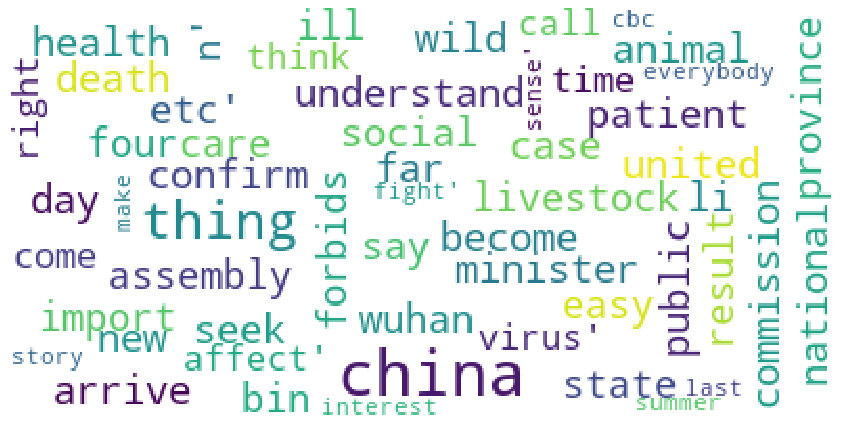

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 400,
        max_font_size = 30, 
        scale = 1,
        random_state = 1
    ).generate(str(data))
    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(data['cleaned_text'].values)

In [15]:
# the column data['hashtags'] returns a list of string(s) for each tweet. Build a list of all hashtags in the dataset.
hashtag_list = []
for i in range(0, len(data)):
    # Obtain the current list of hashtags
    curr_hashtag = data.iloc[i, :]['hashtags']
    
    # Extract and append the hashtags to 'hashtag_list':
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])
        
# No. of hashtags
print('No. of hashtags used in {} tweets is {}'.format(len(data), len(hashtag_list)))

df_hashtag = pd.DataFrame(
    {'hashtags': hashtag_list}
)
print(df_hashtag.head(20))
print('Shape of df_hashtag is:', df_hashtag.shape)

No. of hashtags used in 48711 tweets is 127787
            hashtags
0              wuhan
1         wuhanvirus
2     wuhanpneumonia
3         wuhanvirus
4   wuhancoronavirus
5     wuhanpneumonia
6   wuhancoronavirus
7        coronavirus
8   wuhancoronavirus
9   wuhancoronavirus
10  wuhancoronavirus
11                us
12         americans
13             china
14  wuhancoronavirus
15       coronavirus
16  wuhancoronavirus
17          ncov2019
18              ncov
19  wuhancoronavirus
Shape of df_hashtag is: (127787, 1)


                 hashtags  counts
3097     wuhancoronavirus   43212
3087                wuhan   19627
3125       wuhanpneumonia    7883
3138           wuhanvirus    7223
682           coronovirus    6835
489                 china    4862
645           coronavirus    4455
2964                 wars    2214
1296             hongkong    2116
3119        wuhanoutbreak    2011
665   coronavirusoutbreak    1897
518            chinavirus    1424
639         coronarovirus     870
3104     wuhancoronovirus     710
2434             shanghai     648
678          coronoavirus     620
3132            wuhansars     558
452                   ccp     556
3332                 武汉肺炎     530
2354                 sars     503
3115        wuhanlockdown     446
438             carrielam     414
3269          ไวรัสโคโรนา     398
1033                 food     383
511        chinapneumonia     369
1877             ncov2019     349
356              breaking     346
2927                virus     304
525           

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27721 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32954 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3623 missing from cur

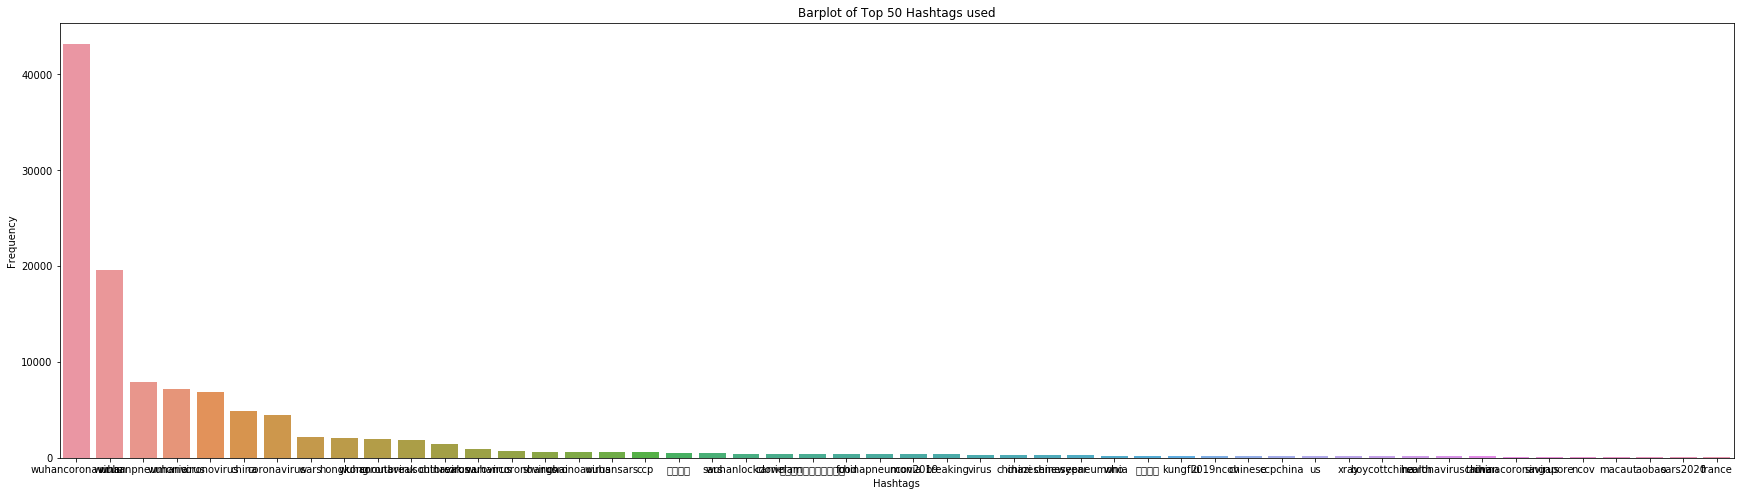

In [16]:
import seaborn as sns

# Define N to be the top number of hashtags
N = 50
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False).head(N)
print(top_hashtags)
# seaborn countplot on the top N hashtags
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = top_hashtags)
plt.title('Barplot of Top ' + str(N) + ' Hashtags used')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

In [17]:
def isNaN(num):
    return num != num

def get_full_name(x):
    if x is None or isNaN(x):
        return None
    else:
        return x['full_name']
data['place_full_name']=data['place'].apply(lambda x: get_full_name(x))

data[data['place_full_name'].apply(lambda x: x is not None)]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords,place_full_name
2,2020-01-22 02:20:07+00:00,1219806921953181697,1219806921953181696,Just in: Wuhan forbids social assemblies and l...,False,"[0, 279]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,wuhan forbids social assembly livestock wild a...,,,0.212,0.788,0.000,-0.7351,169,25,Hong Kong
51,2020-01-22 05:00:34+00:00,1219847297367830528,1219847297367830528,Coronavirus animation under construction now. ...,False,"[0, 187]","{'hashtags': [{'text': 'adobestock', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,coronavirus animation construction second anim...,exoplanet,ཻུ۪۪@weareoneexo 𝖞𝖔𝖚 𝖆𝖗𝖊 𝖒𝖞 𝖜𝖔𝖗𝖑𝖉 𝖆𝖓𝖉 𝖒𝖞 𝖊𝖛𝖊𝖗𝖞...,0.000,0.878,0.122,0.2023,118,14,"Da Nang, Vietnam"
86,2020-01-22 08:25:20+00:00,1219898831950598146,1219898831950598144,"He says that based on existing information, #W...",False,"[0, 274]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/iphone"" r...",1.219898e+18,1.219898e+18,...,say base exist information highly contagious “...,ether,create smart contracts for your digital items ...,0.119,0.881,0.000,-0.4005,150,21,"Taipei City, Taiwan"
264,2020-01-22 10:55:22+00:00,1219936587829506048,1219936587829506048,When asked about the first confirmed #WuhanCor...,False,"[0, 239]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,ask first confirm case press conference geng s...,shah alam,🎼 flutist | 🎤 i love to sing also | 🏤faculty o...,0.000,0.833,0.167,0.4939,117,17,"Taipei City, Taiwan"
354,2020-01-22 11:30:20+00:00,1219945388683268097,1219945388683268096,First US case of #WuhanCoronavirus confirmed 1...,False,"[0, 207]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,NaN,...,first case confirm cdc!\n\ndo still trust trus...,"sri aman, sarawak",🌬🌈\neh gago nya lok!,0.000,0.504,0.496,0.7840,53,9,"Washington, DC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48431,2020-01-25 13:31:53+00:00,1221063139157954562,1221063139157954560,"For now, wag muna tayo order ng products that ...",False,"[0, 140]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,wag muna tayo order ng product ship overseas s...,n.a,n.a,0.079,0.921,0.000,-0.0516,85,15,"Bacoor, Calabarzon"
48433,2020-01-25 13:32:06+00:00,1221063195403546624,1221063195403546624,Taken at #guangzhou Baiyun intl airport on Jan...,False,"[0, 173]","{'hashtags': [{'text': 'guangzhou', 'indices':...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,take baiyun intl airport january evening intl ...,n.a,n.a,0.000,0.864,0.136,0.2960,102,15,"Guangdong, People's Republic of China"
48604,2020-01-25 13:57:18+00:00,1221069535681355778,1221069535681355776,Two females (a chinese woman &amp; a sri lanka...,False,"[0, 232]","{'hashtags': [{'text': 'SriLanka', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,two female chinese woman amp sri lankan phd st...,n.a,n.a,0.110,0.800,0.090,-0.1027,128,18,Sri Lanka
48617,2020-01-25 13:47:01+00:00,1221066948156350466,1221066948156350464,Can we just start calling the #coronavirus #Ku...,False,"[0, 64]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,start call,n.a,n.a,0.000,1.000,0.000,0.0000,10,2,"Edmonton, Alberta"


In [18]:
data[data['coordinates'].apply(lambda x: x is not None and not isNaN(x))]
# data['coordinates']

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords,place_full_name
354,2020-01-22 11:30:20+00:00,1219945388683268097,1219945388683268096,First US case of #WuhanCoronavirus confirmed 1...,False,"[0, 207]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,NaN,...,first case confirm cdc!\n\ndo still trust trus...,"sri aman, sarawak",🌬🌈\neh gago nya lok!,0.000,0.504,0.496,0.7840,53,9,"Washington, DC"
992,2020-01-22 15:20:02+00:00,1220003191640809472,1220003191640809472,[22 Jan 2020] There has been an #outbreak of #...,False,"[0, 241]","{'hashtags': [{'text': 'outbreak', 'indices': ...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,jan cause widespread worry across world howeve...,,daily updates about coronavirus,0.244,0.756,0.000,-0.4404,64,10,"Southern District, Hong Kong"
4494,2020-01-23 06:53:28+00:00,1220238100992970754,1220238100992970752,[23 Jan 2020] There has been an #outbreak of #...,False,"[0, 234]","{'hashtags': [{'text': 'outbreak', 'indices': ...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,jan cause widespread worry across world howeve...,n.a,n.a,0.244,0.756,0.000,-0.4404,62,10,"Central & Western District, Hong Kong"
5180,2020-01-23 07:30:05+00:00,1220247312519266304,1220247312519266304,[23 Jan 2020 🇨🇳] There has been an #outbreak o...,False,"[0, 236]","{'hashtags': [{'text': 'outbreak', 'indices': ...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,jan cause widespread worry across world wuhan ...,n.a,n.a,0.244,0.756,0.000,-0.4404,67,10,"Central & Western District, Hong Kong"
24678,2020-01-24 10:55:31+00:00,1220661399245946886,1220661399245946880,Bleu cheeseburger and San Mig Light. Because t...,False,"[0, 176]","{'hashtags': [{'text': 'WuhanCoronaVirus', 'in...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,bleu cheeseburger san mig light world might en...,n.a,n.a,0.000,1.000,0.000,0.0000,77,12,"Pasig City, National Capital Region"
26947,2020-01-24 13:40:32+00:00,1220702929633542147,1220702929633542144,Flying to Hochiminh. Everyone on board is wear...,False,"[0, 159]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,fly hochiminh everyone board wear face mask ch...,n.a,n.a,0.000,1.000,0.000,0.0000,84,11,"Sichuan, People's Republic of China"
32362,2020-01-24 19:47:11+00:00,1220795199040950273,1220795199040950272,#kungflu #coronavirus #chicago #officespace @ ...,False,"[0, 93]","{'hashtags': [{'text': 'kungflu', 'indices': [...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,raleigh north carolina,n.a,n.a,0.000,1.000,0.000,0.0000,22,3,"Raleigh, NC"



Wordcloud for Keyword:  chinazi


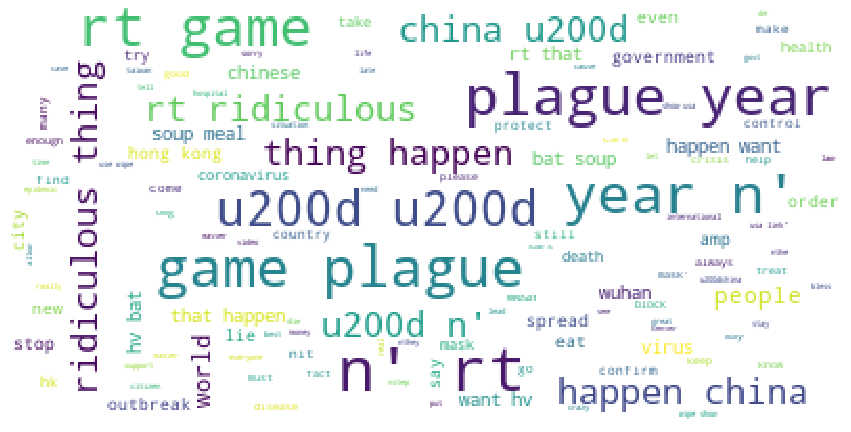


Wordcloud for Keyword:  kungflu


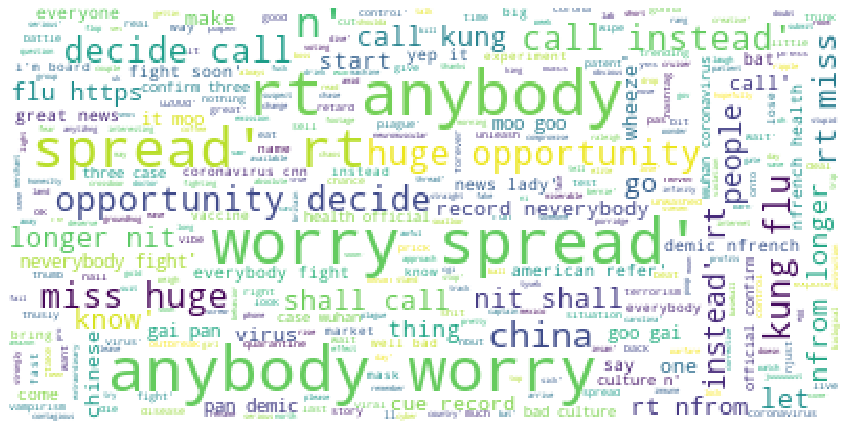


Wordcloud for Keyword:  wuhanvirus


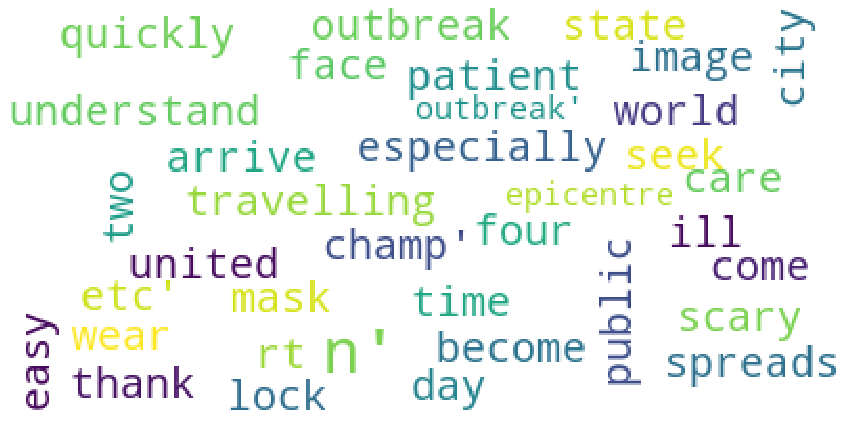


Wordcloud for Keyword:  chinavirus


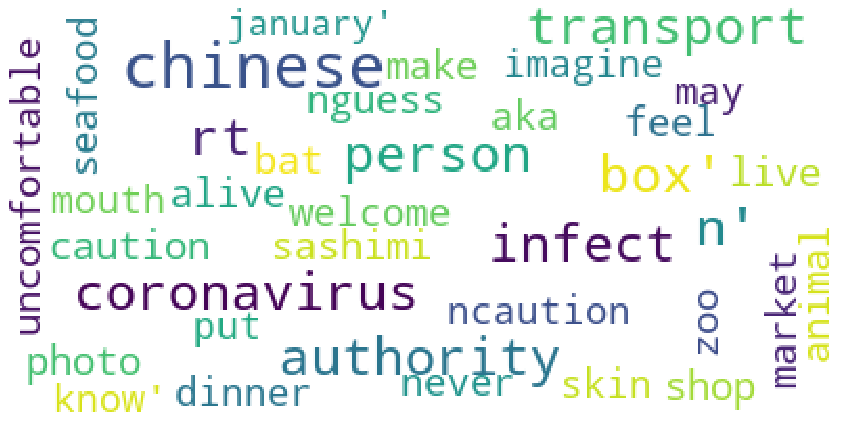

In [44]:
keyword_ts=['chinazi','kungflu','wuhanvirus','chinavirus']
for keyword_t in keyword_ts:
    print('\nWordcloud for Keyword: ', keyword_t)
    df_t = data[data['full_text'].str.contains("(?i)#"+keyword_t)]
    show_wordcloud(df_t['cleaned_text'].values)